# K-means

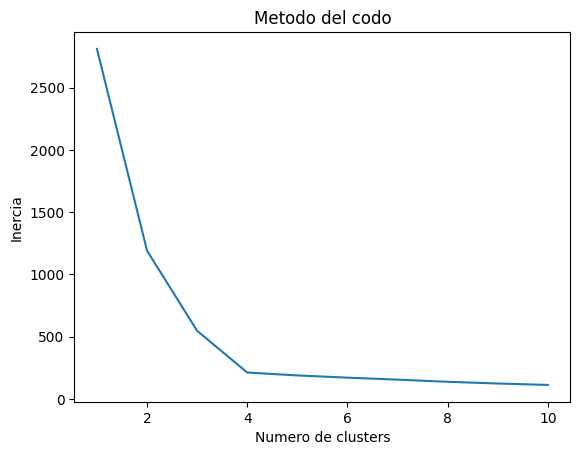

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

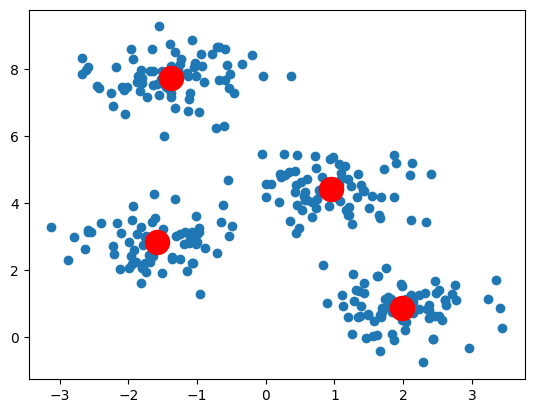

In [2]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Agglomerative Clustering

In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

ModuleNotFoundError: No module named 'google.colab'

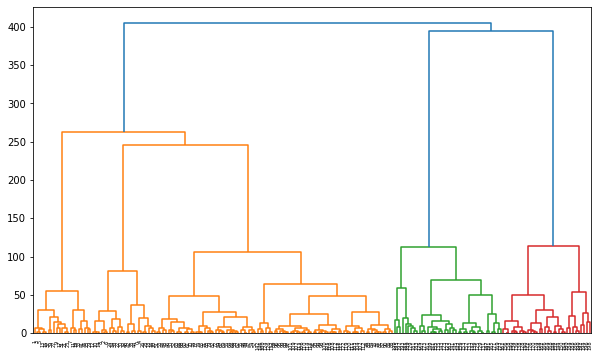

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dataset = pd.read_csv('/content/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


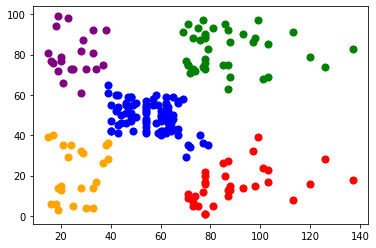

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

# DBSCAN

#. clusters estimado: 2
# puntos ruidosos: 0


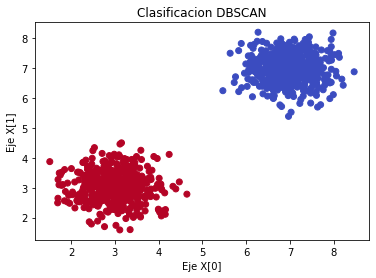

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
# Configuracion de datos y parametros
num_samples_total = 1000;cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0;min_samples = 13
# Generacion de datos
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)
# DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0) # Ruido (Outliers)
print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)
# Generar figura de datos
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Clasificacion DBSCAN')
plt.xlabel('Eje X[0]');plt.ylabel('Eje X[1]')
plt.show()

# Actividad Colaborativa

In [6]:
import pandas as pd
url = 'https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv'
df = pd.read_csv(url, index_col=0)
df.head(5)

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
formatted_date,,,,,,,,,,,,,,
2016-01-01,106.332146,54.353962,742.950012,587.000000,49.853489,50.424938,12.573010,36.897804,57.754189,35.192841,74.235298,71.574371,85.822624,36.139999
2016-02-01,100.671043,52.064243,697.770020,552.520020,46.043667,48.033066,11.132540,33.707108,64.228912,41.061607,67.360649,69.556580,83.956566,38.139999
2016-03-01,108.782211,53.571442,744.950012,593.640015,50.339031,50.524323,12.021718,36.223217,67.336624,44.499886,74.790009,73.631477,91.278160,38.599998
2016-04-01,109.483307,50.457645,693.010010,659.590027,45.453705,53.919910,12.995729,40.153545,66.305466,43.716049,70.465584,74.363144,93.683258,39.180000
2016-05-01,105.648926,49.255203,735.719971,722.789978,48.306515,56.098225,13.201019,40.447887,62.474155,41.198154,70.456474,75.999847,92.817329,37.790001


In [7]:
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

X = df.values
X_2= np.average(X,axis=0); X_3= np.std(X,axis=0)
df_n = pd.DataFrame(); df_n['labels'] = df.columns
df_n['Valores'] = X_2; df_n['Sd']=X_3;df_n.index=df_n['labels']
df_n['Trim']=stats.trim_mean(X, 0.1)
df_n= df_n.drop(columns='labels')
df_n[['Valores', 'Sd','Trim']] = MinMaxScaler().fit_transform(df_n[['Valores', 'Sd','Trim']])
df_n

,Valores,Sd,Trim
labels,,,
MCD,0.077086,0.037153,0.078899
SBUX,0.024480,0.014914,0.023919
GOOG,0.705615,0.614485,0.668251
AMZN,1.000000,1.000000,1.000000
MSFT,0.058936,0.074416,0.055583
JPM,0.040301,0.023653,0.040679
BAC,0.000000,0.000000,0.000000
C,0.016929,0.003106,0.017896
MAR,0.046938,0.021447,0.049068


In [9]:
feature_mtx=df_n.values
feature_mtx
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
import pylab
import scipy.cluster.hierarchy

Z = scipy.cluster.hierarchy.linkage(D, 'complete')
Z

AttributeError: Module 'scipy' has no attribute 'zeros'

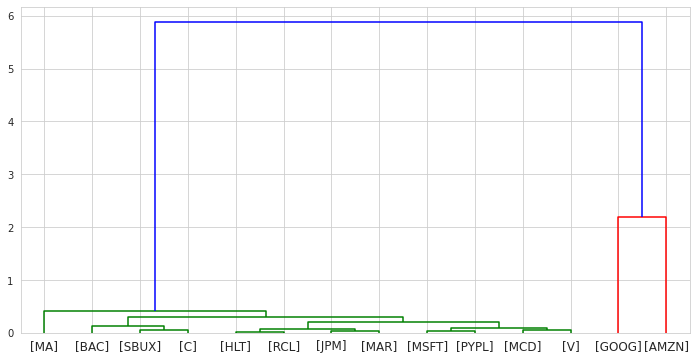

In [ ]:
fig = pylab.figure(figsize=(12,6))
def llf(id):
    return '[%s]' % (df_n.index[id] )

dendro = scipy.cluster.hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'top')

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
df_n['cluster_'] = agglom.labels_
df_n.head()

,Valores,Sd,Trim,cluster_
labels,,,,
MCD,0.077086,0.037153,0.078899,0
SBUX,0.024480,0.014914,0.023919,0
GOOG,0.705615,0.614485,0.668251,2
AMZN,1.000000,1.000000,1.000000,3
MSFT,0.058936,0.074416,0.055583,0


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log



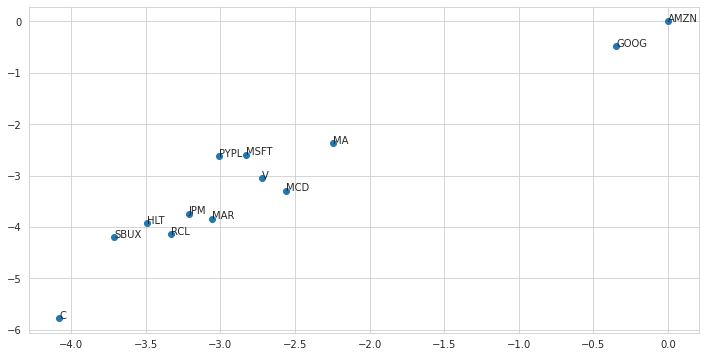

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(np.log(df_n.Valores), np.log(df_n.Sd))

for i, txt in enumerate(df_n.index):
  ax.annotate(txt, (np.log(df_n.Valores[i]), np.log(df_n.Sd[i])))

# PCA

Porcentaje de varianza explicada por cada componente
[0.62006039 0.24744129 0.0891408  0.04335752]


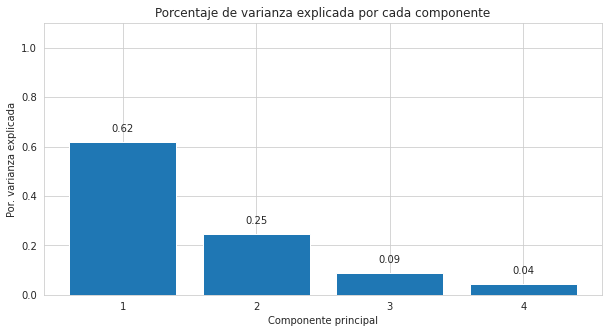

In [ ]:
# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns;sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [ ]:
datos

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


Text(0, 0.5, 'PC2')

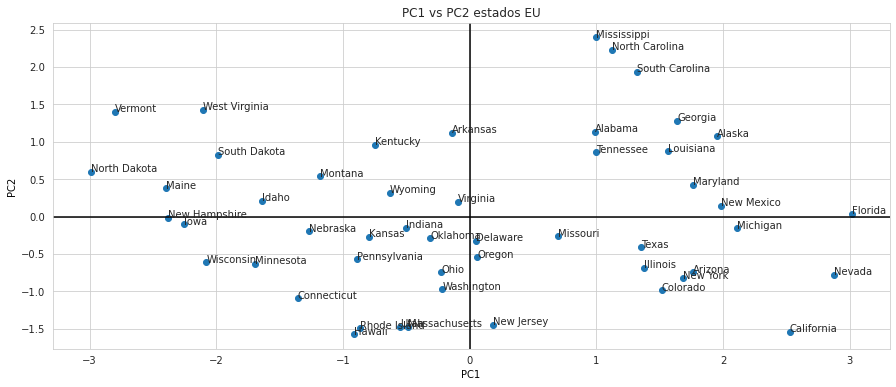

In [ ]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)
plt.figure(figsize=(15,6))
proyecciones['val']=proyecciones.index
ax = proyecciones.set_index('PC1')['PC2'].plot(style='o')
def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['val']))
label_point(proyecciones.PC1, proyecciones.PC2, proyecciones.val, ax)
plt.axvline(x=0,color='black');plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2 estados EU');plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')

In [ ]:
proyecciones

,PC1,PC2,PC3,PC4,val
Alabama,0.985566,1.133392,-0.444269,0.156267,Alabama
Alaska,1.950138,1.073213,2.040003,-0.438583,Alaska
Arizona,1.763164,-0.745957,0.054781,-0.834653,Arizona
Arkansas,-0.141420,1.119797,0.114574,-0.182811,Arkansas
California,2.523980,-1.542934,0.598557,-0.341996,California
Colorado,1.514563,-0.987555,1.095007,0.001465,Colorado
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469,Connecticut
Delaware,0.047709,-0.325359,-0.718633,-0.881978,Delaware
Florida,3.013042,0.039229,-0.576829,-0.096285,Florida
Georgia,1.639283,1.278942,-0.342460,1.076797,Georgia
